# EDA of Different Categories

Based on the customers PLU numbering system, there are 9 distinct categories for all 3000 different grocery items. I will use these pre-determined categories, and explore the data. See what are the seasonalities on a weekly, monthly, and yearly basis. 
>




![alt text](https://drive.google.com/uc?id=1cGVKwDHUPFI5U8ys1U3QSmOrpXZvEKjK)



# Setup-Imports

In [0]:
#Colab stuffs:

#get a fast operator system
!nvidia-smi

#mount google drive
from google.colab import drive
drive.mount('/content/drive')#click on the link it provides and copy and paste that code into the authorization area

#access the OS system to work with current directories:
import os 

Thu Oct 10 18:37:30 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.despine()
sns.set(rc={'figure.figsize':(15,9)})
%matplotlib inline

In [0]:
#Import the cleaned up data frame from the "clean up report"

#df = pd.read_csv('drive/My Drive/Capstone_2/data/df_clean.csv', low_memory=False)
# df = pd.read_csv('drive/My Drive/Capstone_2/data/one_year.csv', low_memory=False)
# df = pd.read_csv('drive/My Drive/Capstone_2/data/two_year.csv', low_memory=False)
#df = pd.read_csv('drive/My Drive/Capstone_2/data/df_2018.csv', low_memory=False)

df = pd.read_csv('drive/My Drive/Capstone_2/data/correct_cat_pivot.csv', index_col= 'invdate', low_memory=False)#categories to test models
#dfqty = pd.read_csv('drive/My Drive/Capstone_2/data/ten_items.csv', index_col= 'invdate', low_memory=False)#individual items to test models


In [0]:
#resetting index to datetime
df.index = pd.to_datetime(df.index)

#filling in the missing days for both dfs
idx = pd.date_range('2018-08-24', '2019-08-23')
df = df.reindex(idx, fill_value=0)

In [0]:
#seeing how many unique label groups there are once the first word was separated out in the description column
df.head()

,dairy_juice,fruit,grains,greens,meat,mushrooms,potatoe,tomatoe,veg
2018-08-24,425.0,250.51,12.0,751.16,0.0,102.0,37.0,46.10,344.93
2018-08-25,90.0,236.00,6.0,240.00,0.0,21.0,10.2,34.00,98.00
2018-08-26,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00
2018-08-27,146.0,274.00,11.0,639.00,0.0,57.0,33.0,56.00,315.50
2018-08-28,330.0,193.00,29.0,585.00,2.0,41.0,28.0,48.86,322.50


# Overview of the Different Categories

Text(0.5, 1.0, 'Count Plot of the Newly Created Item Categories')

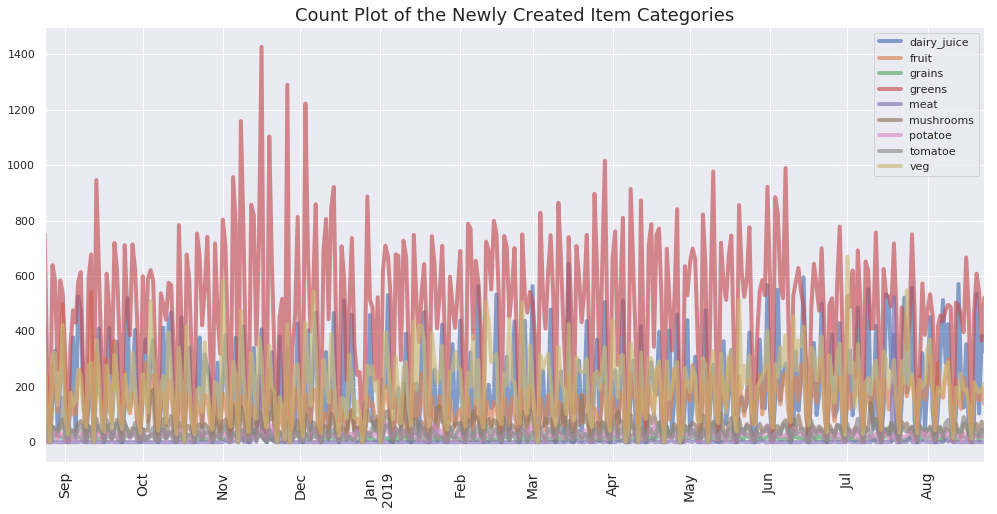

In [0]:
#Large view of different cateogories

df.plot(figsize=(15,8), linewidth= 4, alpha= .65)
plt.xticks(rotation =90, fontsize= 14)
plt.legend()
plt.title('Count Plot of the Newly Created Item Categories', fontsize= 18)

### Based on this plot I went back and combined meat & GObox into specialty and bread into dry_goods because 
#these separate categories were too insignificant compared to the other data points


 Timeseries of Five Largest Food Categories



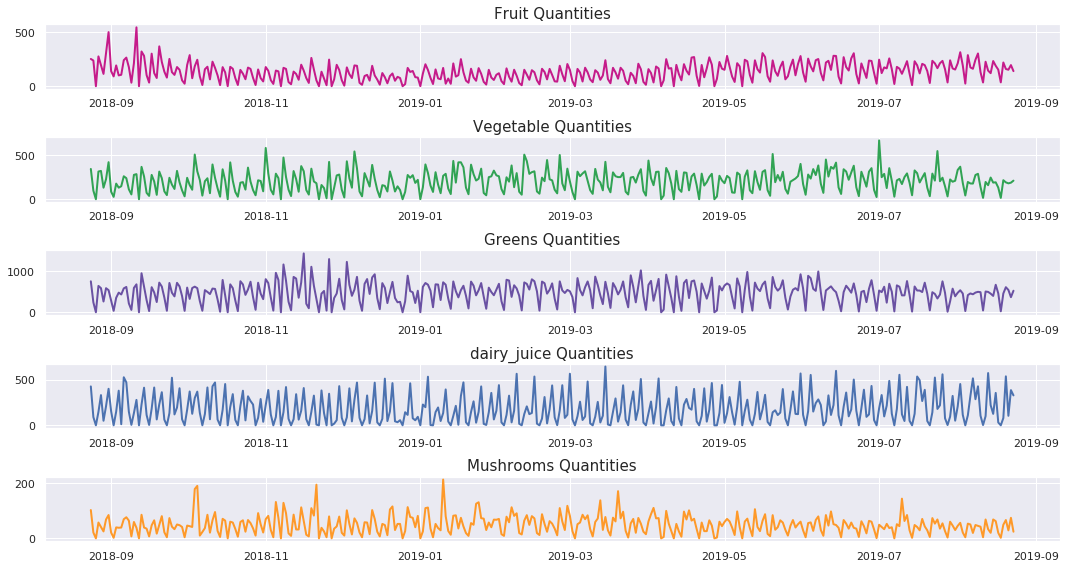

In [0]:
#visualizing categories
fig, axs = plt.subplots(5, figsize=(15,8))
print('\n Timeseries of Five Largest Food Categories:\n')

axs[0].plot(df.index, df['fruit'], linewidth= 2, label= 'fruit', color= '#c51b8a')
axs[0].set_title ("Fruit Quantities", fontsize= 15)
axs[1].plot(df.index, df['veg'], linewidth= 2, label= 'veg', color = '#31a354')
axs[1].set_title ("Vegetable Quantities", fontsize= 15)
axs[2].plot(df.index, df['greens'], linewidth= 2, label= 'greens, herbs, sprouts', color= '#6a51a3')
axs[2].set_title ("Greens Quantities", fontsize= 15)
axs[3].plot(df.index, df['dairy_juice'], linewidth= 2, label= 'dairy_juice')
axs[3].set_title ("dairy_juice Quantities", fontsize= 15)
axs[4].plot(df.index, df['mushrooms'], linewidth= 2, label= 'mushrooms', color= '#fe9929')
axs[4].set_title ("Mushrooms Quantities", fontsize= 15)
plt.tight_layout()


 Timeseries of Four Smallest Food Categories:



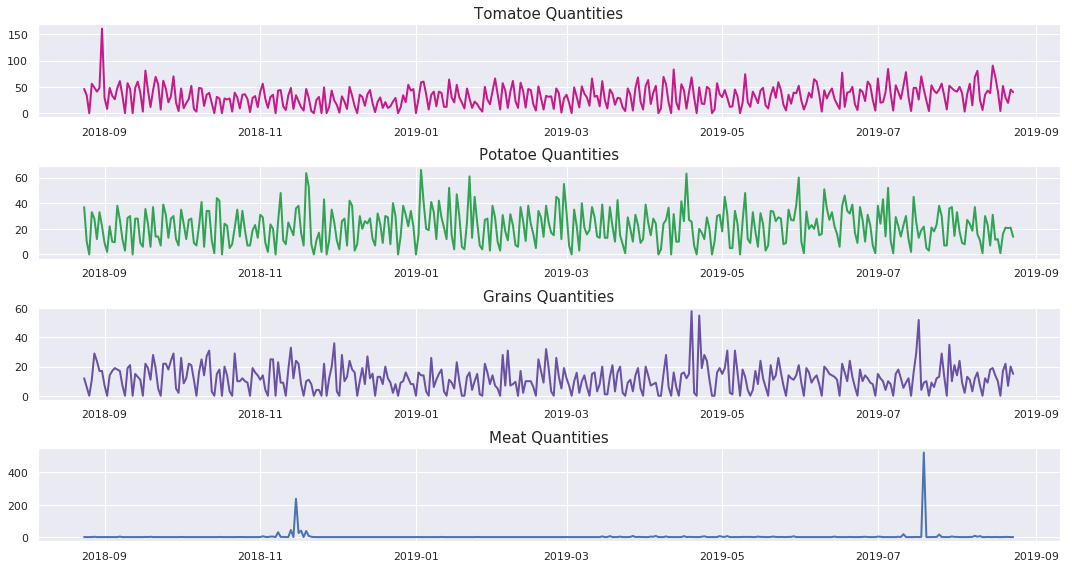

In [0]:
fig, axs = plt.subplots(4, figsize=(15,8))

print('\n Timeseries of Four Smallest Food Categories:\n')
axs[0].plot(df.index, df['tomatoe'], linewidth= 2, label= 'tomatoe', color= '#c51b8a')
axs[0].set_title ("Tomatoe Quantities", fontsize= 15)
axs[1].plot(df.index, df['potatoe'], linewidth= 2, label= 'potatoe', color = '#31a354')
axs[1].set_title ("Potatoe Quantities", fontsize= 15)
axs[2].plot(df.index, df['grains'], linewidth= 2, label= 'grains', color= '#6a51a3')
axs[2].set_title ("Grains Quantities", fontsize= 15)
axs[3].plot(df.index, df['meat'], linewidth= 2, label= 'meat')
axs[3].set_title ("Meat Quantities", fontsize= 15)
plt.tight_layout()


#### Insights:


*   Greens is by far the largest category, it also has some seasonality around Thanksgiving and Christmas.
*   Meat is awful, does not have enough data points to make an accurate forecast at all. This will be an issue on the individual level. That's why we almost NEED to segment out all the strawberries together, all the Fuji Apples together ect. The ten individual items we will test this theory.
* There are a lot of random spikes in the data. It would be nice to know if they were random or could be predicted. My feeling is that these are random spikes.
* Around half the categories show increases in order quantity around the holidays, and a decrease over the summer season. This seems like a trend that can be trusted. However, it needs to be customized per category.



# Taking a closer look at Weekly, Monthly, and day of the week seasonalities

In [0]:
#Create features for analysis
 
df['month'] = df.index.month 
df['week'] = df.index.week 
df['day'] = df.index.day_name()
df.head()

,dairy_juice,fruit,grains,greens,meat,mushrooms,potatoe,tomatoe,veg,year,month,day,week
2018-08-24,425.0,250.51,12.0,751.16,0.0,102.0,37.0,46.10,344.93,2018,8,Friday,34
2018-08-25,90.0,236.00,6.0,240.00,0.0,21.0,10.2,34.00,98.00,2018,8,Saturday,34
2018-08-26,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,2018,8,Sunday,34
2018-08-27,146.0,274.00,11.0,639.00,0.0,57.0,33.0,56.00,315.50,2018,8,Monday,35
2018-08-28,330.0,193.00,29.0,585.00,2.0,41.0,28.0,48.86,322.50,2018,8,Tuesday,35


In [0]:
#re-index the dataset
dfw = df.groupby('week').sum()
dfw.head()

,dairy_juice,fruit,grains,greens,meat,mushrooms,potatoe,tomatoe,veg,year,month,day
week,,,,,,,,,,,,
1,1052.00,642.85,55.0,3165.46,0.0,365.0,183.00,234.32,1291.56,14132,18,52
2,953.97,573.54,79.0,3458.87,1.0,449.5,190.00,192.50,1280.66,14133,7,70
3,1145.00,859.00,58.0,3294.02,0.0,345.0,158.01,227.50,2018.28,14133,7,119
4,1029.00,626.53,59.0,3509.12,1.0,532.3,180.00,136.23,1589.38,14133,7,168
5,1190.00,577.37,72.0,3064.00,0.0,325.5,138.00,243.00,1543.42,14133,10,124


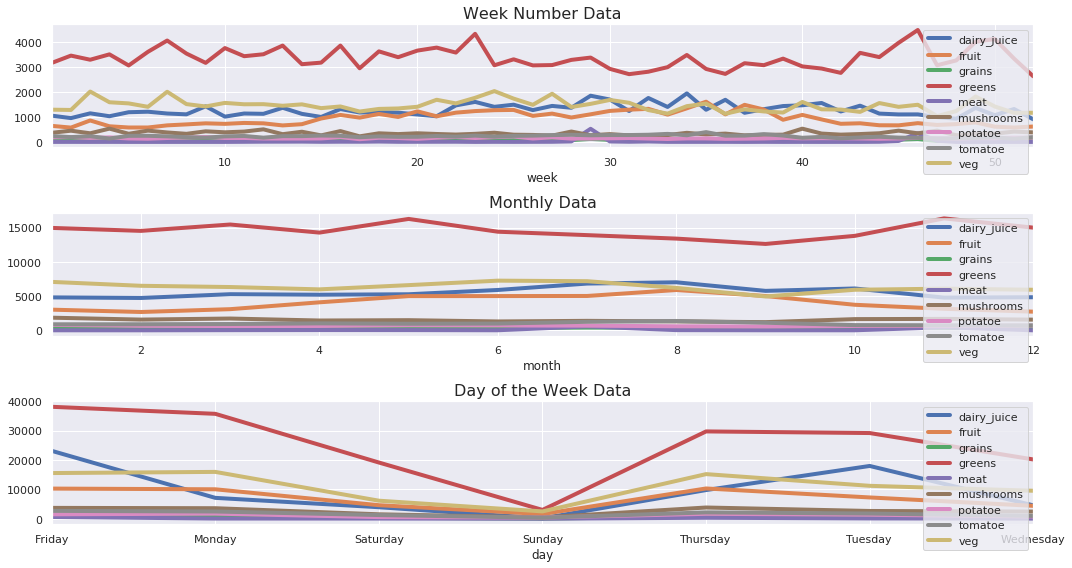

In [0]:
#re-index the dataset
cat= ['dairy_juice', 'fruit', 'grains', 'greens', 'meat', 'mushrooms', 'potatoe', 'tomatoe', 'veg']
dfw = df.groupby('week').sum()
dfm = df.groupby('month').sum()
dfd = df.groupby('day').sum()


fig, axes = plt.subplots(nrows=3, ncols=1)

#plotting
dfw[cat].plot(figsize=(15,8), linewidth = 4, ax=axes[0])
axes[0].title.set_text('Week Number Data')
axes[0].title.set_fontsize(16)

dfm[cat].plot(figsize=(15,8), linewidth = 4, ax=axes[1])
axes[1].title.set_text('Monthly Data')
axes[1].title.set_fontsize(16)

dfd[cat].plot(figsize=(15,8), linewidth = 4, ax=axes[2])
axes[2].title.set_text('Day of the Week Data')
axes[2].title.set_fontsize(16)

plt.tight_layout()

Text(0, 0.5, 'Cumulative Quantites Ordered')

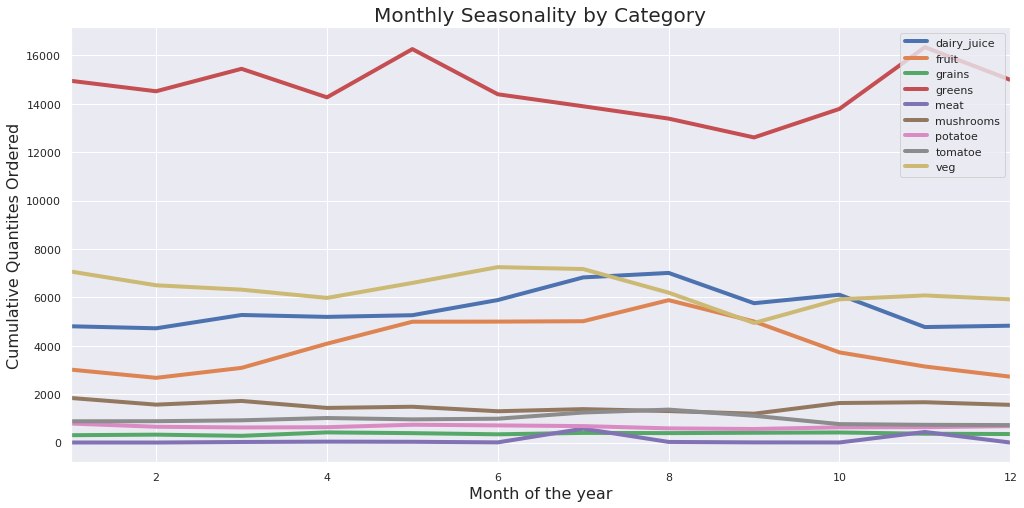

In [0]:
#Plotting Monthly

#re-index the dataset
dfm = df.groupby('month').sum()

#plotting
dfm[['dairy_juice', 'fruit', 'grains', 'greens', 'meat', 'mushrooms', 'potatoe', 'tomatoe', 'veg']].plot(figsize=(15,8), linewidth = 4)
plt.title('Monthly Seasonality by Category', fontsize= 20)
plt.xlabel ('Month of the year', fontsize= 16)
plt.ylabel ('Cumulative Quantites Ordered', fontsize= 16)

#### Insights


*   Fruit and dairy/juice seem to have a summer seasonality; 

* Whereas greens and veggies seem to dip in the summer and increase during the winter and spring months. This seems to coincide with the clients tales of local farms selling directly to restaurants/grocery stores (effitively cutting out the distributor) in the summer months when their products are harvested. Makes sense.
*   Greens seem to spike for this distributor in the spring months and around the holidays
* All of the other items have practically zero seasonality which is interesting! These must represent the staples their customers order year round no matter what the season.
* Fridays, Mondays, and Thursdays seem to be the biggest ordering days (this forecast is going to be designed for Sundays and Thursdays)
* Week numbers are really just showing the same thing as the monthly seasonality so this would be good to incorporate in the prophet model
* Greens, veg, fruit, dairy/juice categories have the greatest potential for model customization!


# Visualizing the outliers under each category:

How many outliers are there in each category? How many of those nasty outliers are there??? We will utilize box charts to visualize this.


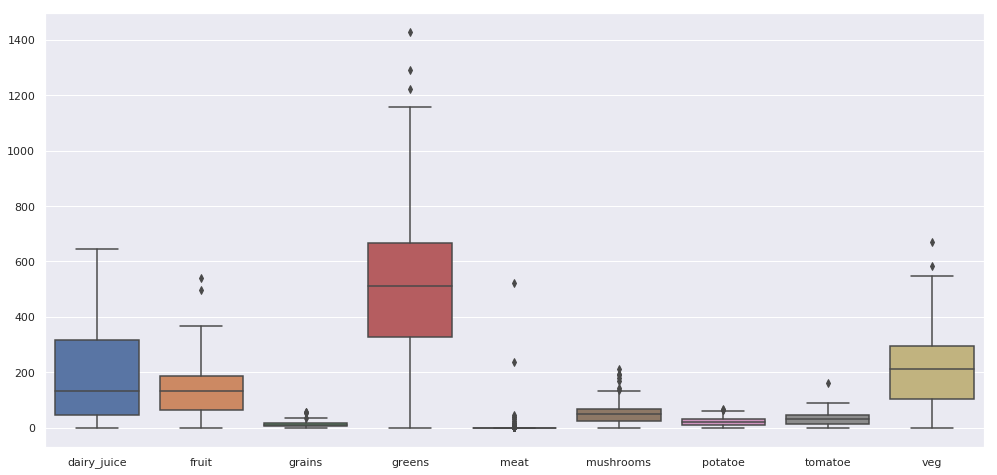

In [0]:
# Draw Plot
fig, axes = plt.subplots(figsize=(15,8))
sns.boxplot(data=df[cat])
#sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# # Set Title
# axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
# axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
# plt.show()

#### Insights


*   Not too terrible. There's a handful of outliers in each category (with mushrooms having probably too many), but these aren't so concerning.
*   My question is that on an individual item level this probably looks way worse.



# Visualizing the individual items under the broader category
What do the distributions of each item look like under each category?


In [0]:
#importing the main dataframe
main_df = pd.read_csv('drive/My Drive/Capstone_2/data/one_year_categories.csv', index_col = 'invdate', parse_dates= True )#categories to test models
main_df['month'] = main_df.index.month 
main_df['week'] = main_df.index.week 
main_df['day'] = main_df.index.day_name()

How the individual items compare to the distribution of the entire category??



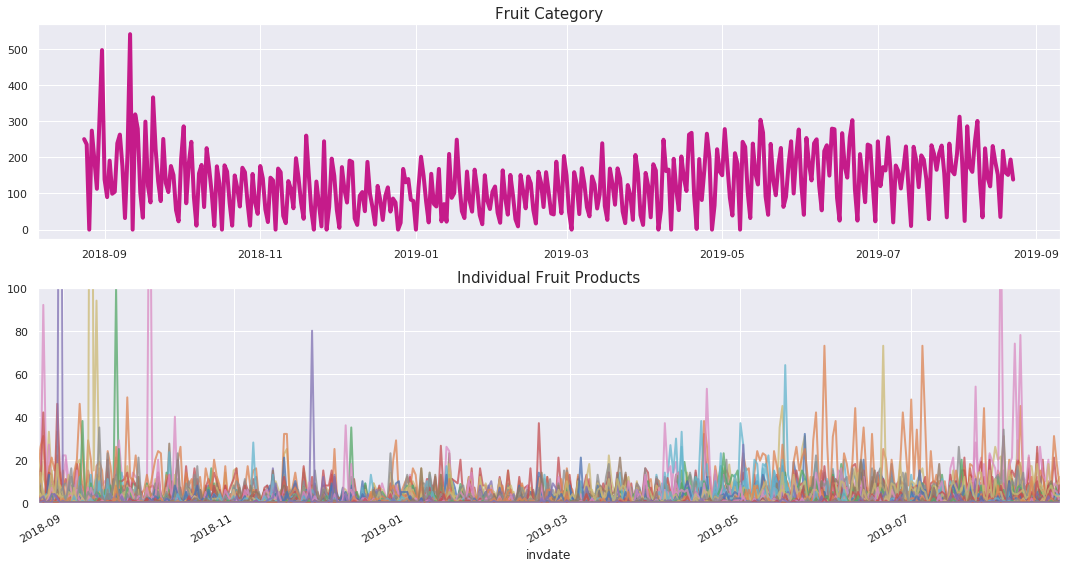

In [0]:
#Fruit Category

fdf= main_df[main_df.cat == 'fruit']
fdf = pd.pivot_table(fdf, values= "ordqty", index= "invdate", columns = "item", aggfunc=np.sum, fill_value=0)

fig, axs = plt.subplots(2, figsize=(15,15))
axs[0].plot(df.index, df['fruit'], linewidth= 4, label= 'fruit', color= '#c51b8a')
axs[0].set_title ("Overall Fruit Category", fontsize= 15)

print("How the individual items compare to the distribution of the entire category??\n")
fdf.plot(figsize= (15,8), legend= False, linewidth= 2.5, alpha= .65, ax= axs[1])
axs[1].set_title ("Individual Fruit Products", fontsize= 15)
axs[1].set_ylim (0, 100)

plt.tight_layout()

Text(0.5, 1.0, 'Fruit Category')

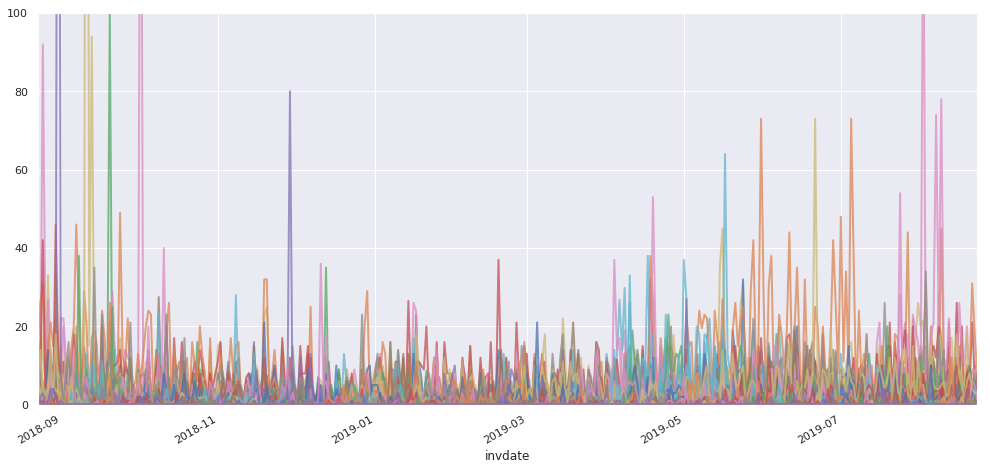

In [0]:
#upclose on the fruit category!

fdf.plot(figsize= (15,8), legend= False, linewidth= 2, alpha= .75)
plt.ylim (0, 100)
axs[0].plot(df.index, df['fruit'], linewidth= 4, label= 'fruit', color= '#c51b8a')
axs[0].set_title ("Fruit Category", fontsize= 15)

In [0]:
df.columns

Index(['dairy_juice', 'fruit', 'grains', 'greens', 'meat', 'mushrooms',
       'potatoe', 'tomatoe', 'veg', 'year', 'month', 'day', 'week'],
      dtype='object')

How the individual items compare to the distribution of the entire category??



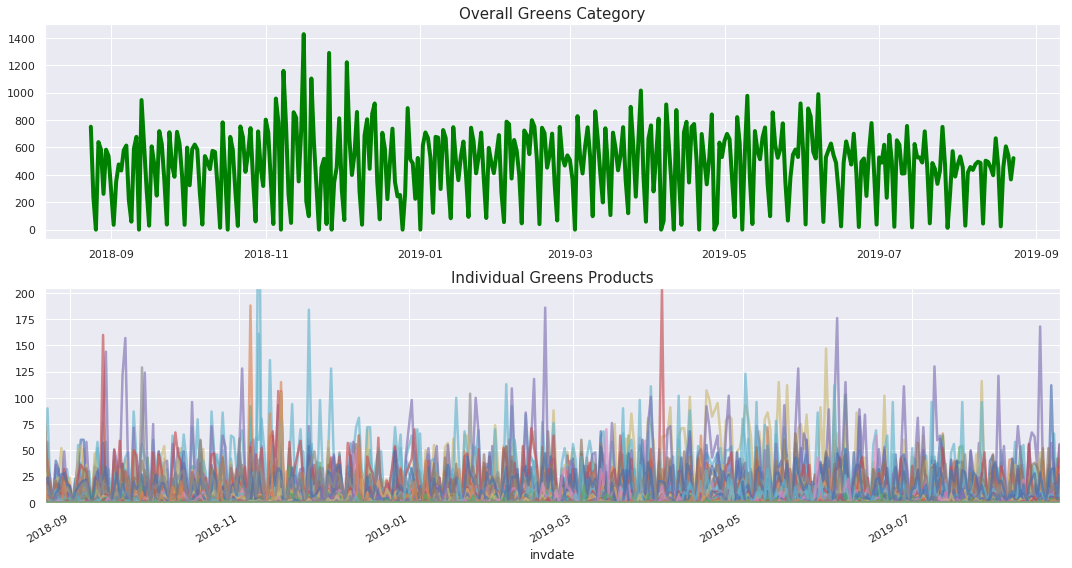

In [0]:
#Greens Category

fdf= main_df[main_df.cat == 'greens']
fdf = pd.pivot_table(fdf, values= "ordqty", index= "invdate", columns = "item", aggfunc=np.sum, fill_value=0)

fig, axs = plt.subplots(2, figsize=(15,15))
axs[0].plot(df.index, df['greens'], linewidth= 4, label= 'fruit', color= 'green')
axs[0].set_title ("Overall Greens Category", fontsize= 15)

print("How the individual items compare to the distribution of the entire category??\n")
fdf.plot(figsize= (15,8), legend= False, linewidth= 2.5, alpha= .65, ax= axs[1])
axs[1].set_title ("Individual Greens Products", fontsize= 15)
axs[1].set_ylim (0, 205)

plt.tight_layout()

How the individual items compare to the distribution of the entire category??



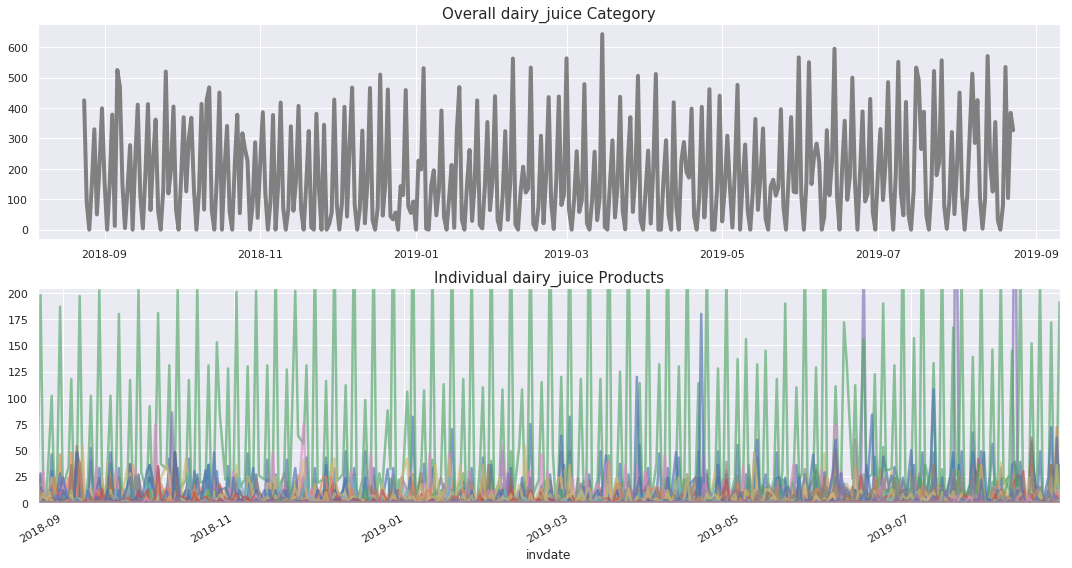

In [0]:
#Dairy/Juice Category

fdf= main_df[main_df.cat == 'dairy_juice']
fdf = pd.pivot_table(fdf, values= "ordqty", index= "invdate", columns = "item", aggfunc=np.sum, fill_value=0)

fig, axs = plt.subplots(2, figsize=(15,15))
axs[0].plot(df.index, df['dairy_juice'], linewidth= 4, label= 'fruit', color= 'grey')
axs[0].set_title ("Overall dairy_juice Category", fontsize= 15)

print("How the individual items compare to the distribution of the entire category??\n")
fdf.plot(figsize= (15,8), legend= False, linewidth= 2.5, alpha= .65, ax= axs[1])
axs[1].set_title ("Individual dairy_juice Products", fontsize= 15)
axs[1].set_ylim (0, 205)

plt.tight_layout()

How the individual items compare to the distribution of the entire category??



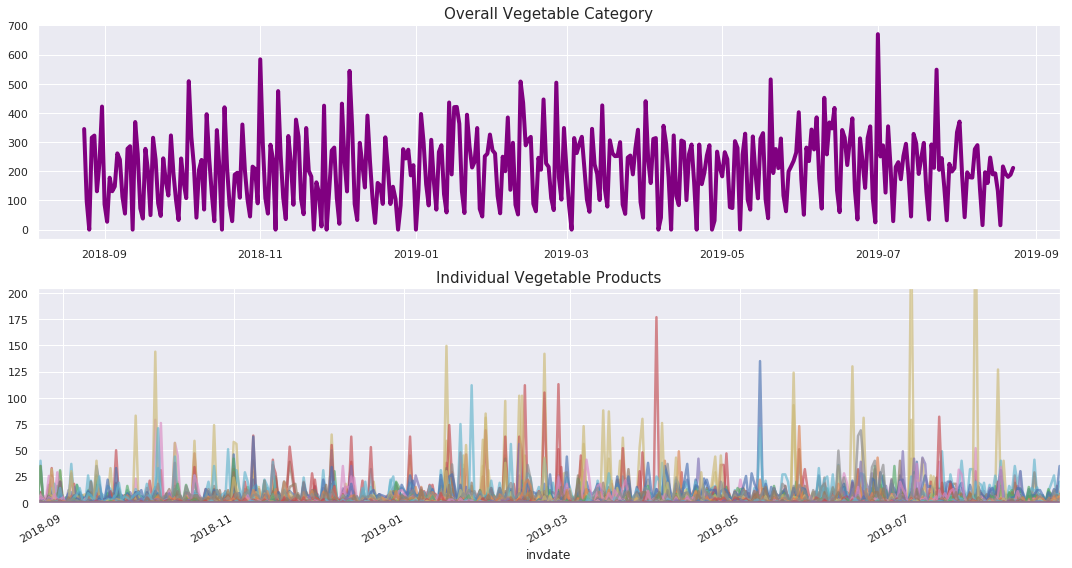

In [0]:
#Veg Category

fdf= main_df[main_df.cat == 'veg']
fdf = pd.pivot_table(fdf, values= "ordqty", index= "invdate", columns = "item", aggfunc=np.sum, fill_value=0)

fig, axs = plt.subplots(2, figsize=(15,15))
axs[0].plot(df.index, df['veg'], linewidth= 4, label= 'veg', color= 'purple')
axs[0].set_title ("Overall Vegetable Category", fontsize= 15)

print("How the individual items compare to the distribution of the entire category??\n")
fdf.plot(figsize= (15,8), legend= False, linewidth= 2.5, alpha= .65, ax= axs[1])
axs[1].set_title ("Individual Vegetable Products", fontsize= 15)
axs[1].set_ylim (0, 205)

plt.tight_layout()

#### Insights

Hookay! I've seen enough. Clearly there are outliers within each category that are affecting the overall trend


#### What to do?
*   First of all, if I proceed like this, these categories are not going to give me a good estimate per item because the items do have different distributions
* Solutions:
> * Average or take the median, instead of take the sum of all the items per category... this will help give a more accurate picture of the items underneath the broad category
> * fit a model to all the individual items. With the problem being the lack of data for the models to work with.



# Takeaways:


1.   Try monthly seasonality with the prophet model
2.   Look into coercing outliers
3.  Try averaging the items instead of summing per category

